# Computational Structural Design II - Mesh Datastructure II

### Learning Goal: 
- Mesh and half-edge data structure
- How to solve topological questions
- Mesh Attributes
- Subdivison


### Content:
- A. Half-edge Datastucture


# A. Mesh and Half-Edge Datastructure

## A_1. COMPAS Mesh and Half-edge Datastructure
A mesh can be constructed from vertex and face information. However, how can we answer the **topological questions**? </br>
e.g. Which vertices are connected with vertex 4? Which faces are surrending vertex 4? 

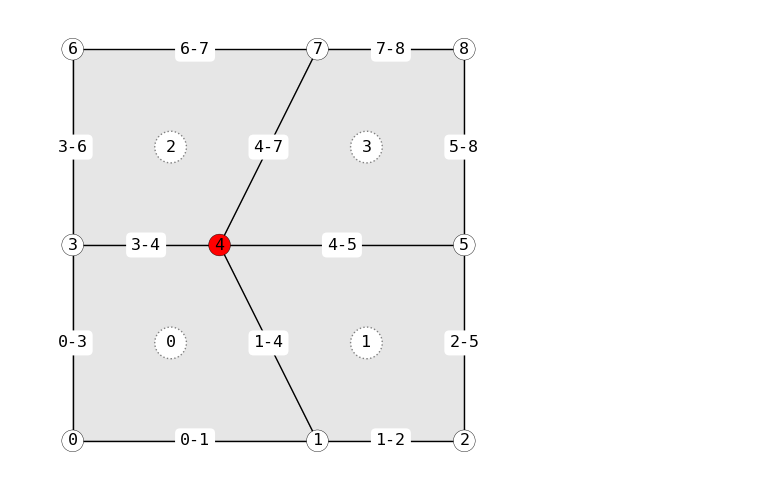

In [17]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vertex_color = {4: (1.0, 0.0, 0.0)}

plotter = Plotter()

meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_edgelabels()
meshartist.draw_facelabels()

plotter.zoom_extents()
plotter.show()

In COMPAS, meshes are presented using a half-edge data structure. In a half-edge data structure, each **edge** is composed of **a pair of half-edge twins** that point at opposite orientations. `mesh.half_edge` tells the half edge information. A vertex stores a reference to a half-edge that originates from that vertex, and the face that half-edge belongs to. For an edge on the boundary, one of the half-edge pairs belongs to an non-existing `None` face.

| u | v | fkey |
| :---: | :---: | :---: |
| 0 | 1 | 0 |
|   | 3 | None |
| 1 | 0 | None |
|   | 4 | 0 |
|   | 2 | 1 |
| 2 | 1 | None |
|   | 5 | 1 |
| 3 | 4 | 2 |
|   | 0 | 0 |
|   | 6 | None |
| 4 | 1 | 1 |
|   | 3 | 0 |
|   | 5 | 3 |
|   | 7 | 2 |
| 5 | 2 | None |
|   | 4 | 1 |
|   | 8 | 3 |
| 6 | 7 | None |
|   | 3 | 2 |
| 7 | 4 | 3 |
|   | 6 | 2 |
|   | 8 | None |
| 8 | 5 | None |
|   | 7 | 3 |

## EXPLAIN how the half-edge is constructed while using add vertex and add face to the mesh....

In [18]:
print(mesh.halfedge) # get halfedge information

{0: {1: 0, 3: None}, 1: {0: None, 4: 0, 2: 1}, 2: {1: None, 5: 1}, 3: {4: 2, 0: 0, 6: None}, 4: {1: 1, 3: 0, 5: 3, 7: 2}, 5: {2: None, 4: 1, 8: 3}, 6: {7: None, 3: 2}, 7: {4: 3, 6: 2, 8: None}, 8: {5: None, 7: 3}}


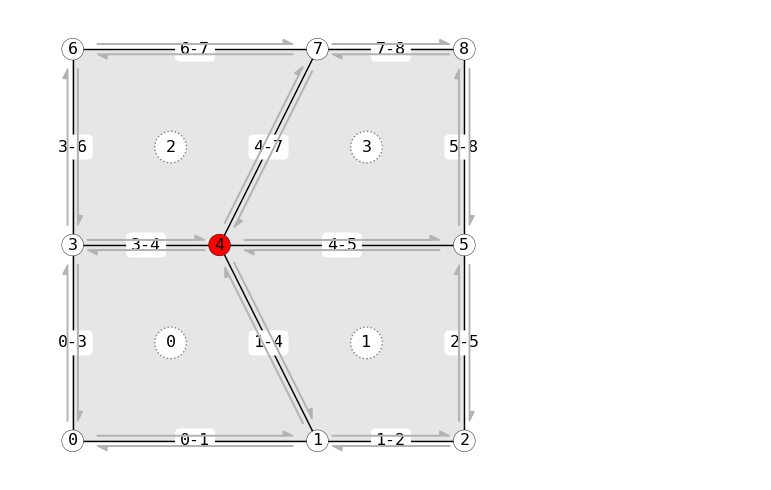

In [19]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vertex_color = {4: (1.0, 0.0, 0.0)}

plotter = Plotter()

meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_edgelabels()
meshartist.draw_facelabels()
meshartist.draw_halfedges()

plotter.zoom_extents()
plotter.show()

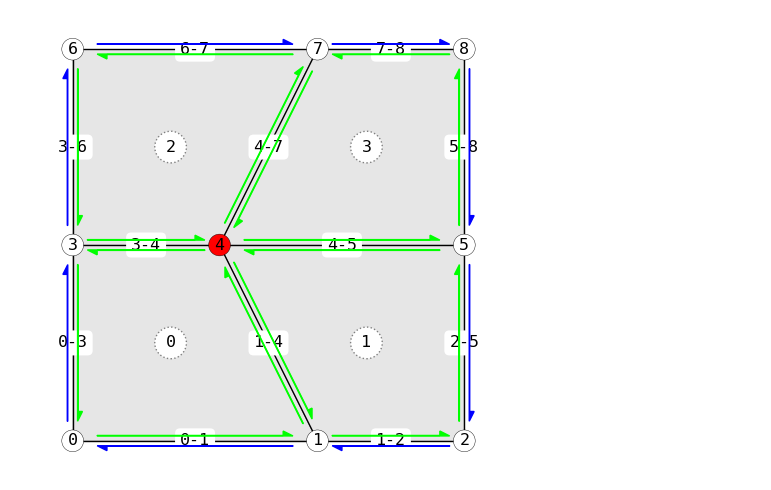

In [24]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vertex_color = {4: (1.0, 0.0, 0.0)}
halfedge_color = {}
for u, v in mesh.edges():
    if mesh.halfedge_face(u, v) is None:
        color = (0.0, 0.0, 1.0)
    else:
        color = (0.0, 1.0, 0.0)
    halfedge_color[u, v] = color

    if mesh.halfedge_face(v, u) is None:
        color = (0.0, 0.0, 1.0)
    else:
        color = (0.0, 1.0, 0.0)

    halfedge_color[v, u] = color


plotter = Plotter()
meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_edgelabels()
meshartist.draw_facelabels()
meshartist.draw_halfedges(color=halfedge_color)
plotter.zoom_extents()
plotter.show()

## A_2. Twin, Next, and Previous Half-edges

In the Polygon, the line segments form a continuous cycle, connecting the vertices in order. These directed line segments are called half-edge. If an edge is shared by two faces, it can be decomposed into 2 twin half-edges, which have the opposite directions and each face can have a half-edge. The half-edge adjacencies define the connectivity of faces. 


<img src="https://files.gitbook.com/v0/b/gitbook-legacy-files/o/assets%2F-M730QpQnbAMvz44bqhc%2F-MOH3yDnBEO8NEXs8leP%2F-MOHIkRqhipSVWxsGy4m%2Fimage.png?alt=media&token=b585d605-e4c7-4689-935d-5b6623fe679d" width="500" style="margin-left:auto; margin-right:auto"/>
</br>


### A_2a. Twin Half-Edges

True


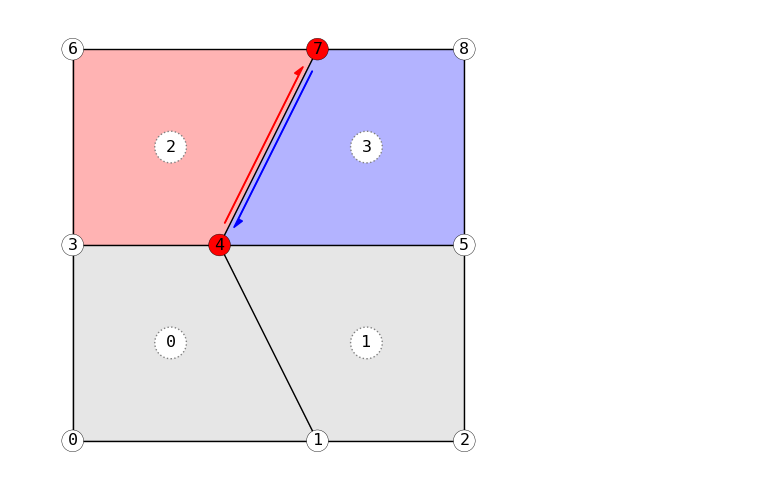

In [31]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

U, V = 4, 7
vertex_color = {U: (1.0, 0.0, 0.0), V: (1.0, 0.0, 0.0)}
halfedges = [(U, V), (V, U)]

print(mesh.halfedge[U][V] == mesh.halfedge_face(U, V))

face_color = {
   mesh.halfedge_face(U, V): (1.0, 0.7, 0.7),
   mesh.halfedge_face(V, U): (0.7, 0.7, 1.0)
}

halfedge_color = {
   (U, V): (1.0, 0.0, 0.0),
   (V, U): (0.0, 0.0, 1.0)
}


plotter = Plotter()
meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color, facecolor=face_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
meshartist.draw_halfedges(halfedges=halfedges, color=halfedge_color)
plotter.zoom_extents()
plotter.show()

### A_2a. Next Half-Edges

[1, 3, 5, 7]


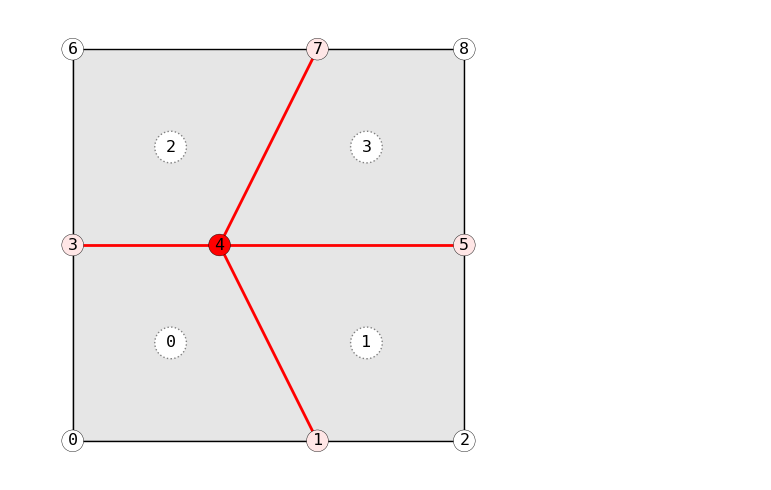

In [38]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vkey = 4

vertex_color = {vkey: (1.0, 0.0, 0.0)}
edge_color = {}
edge_width = {}

print(list(mesh.halfedge[vkey].keys()))

for nbr in mesh.vertex_neighbors(VERTEX):
    vertex_color[nbr] = (1.0, 0.9, 0.9)

for edge in mesh.vertex_edges(VERTEX):
    edge_color[edge] = (1.0, 0.0, 0.0)
    edge_width[edge] = 2.0


plotter = Plotter()
meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color, edgecolor=edge_color, edgewidth=edge_width)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

[1, 3, 5, 7]


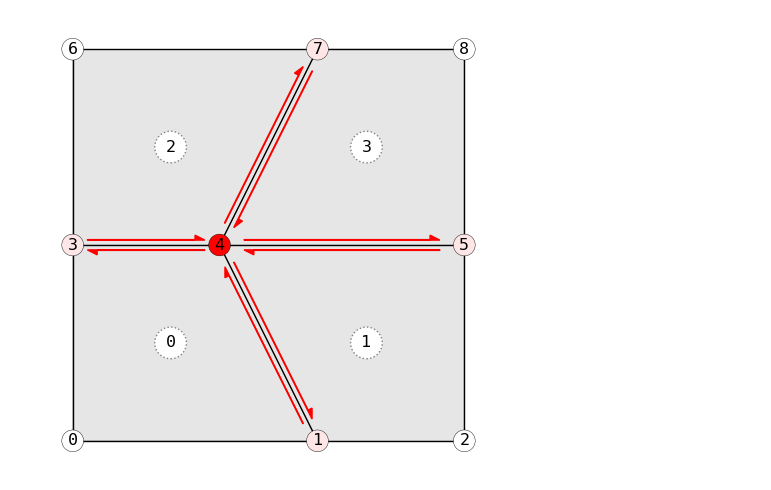

In [45]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vkey = 4

vertex_color = {vkey: (1.0, 0.0, 0.0)}

print(list(mesh.halfedge[vkey].keys()))

for nbr in mesh.vertex_neighbors(VERTEX):
    vertex_color[nbr] = (1.0, 0.9, 0.9)

halfedges = []
for u, v in mesh.vertex_edges(VERTEX):
    halfedges.append((u, v))
    halfedges.append((v, u))


plotter = Plotter()
meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
meshartist.draw_halfedges(halfedges=halfedges, color=(1.0, 0.0, 0.0))
plotter.zoom_extents()
plotter.show()

[1, 3, 5, 7]


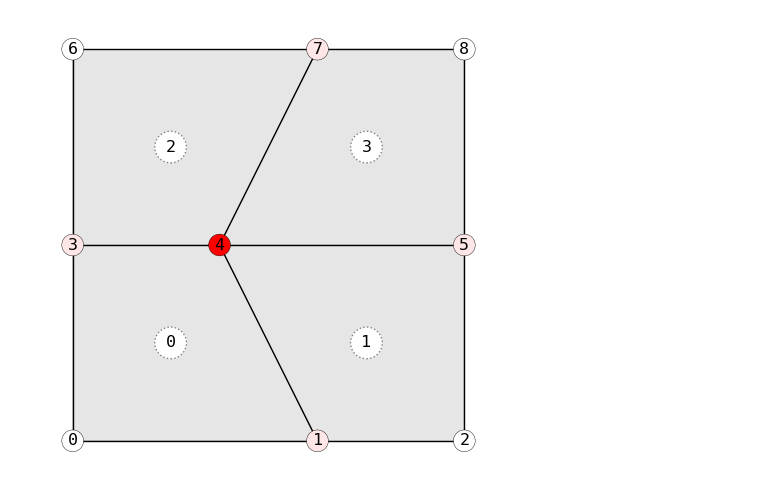

---

# B. Topology
## B1. Vertex
### B1_a. Vertex Neighbours

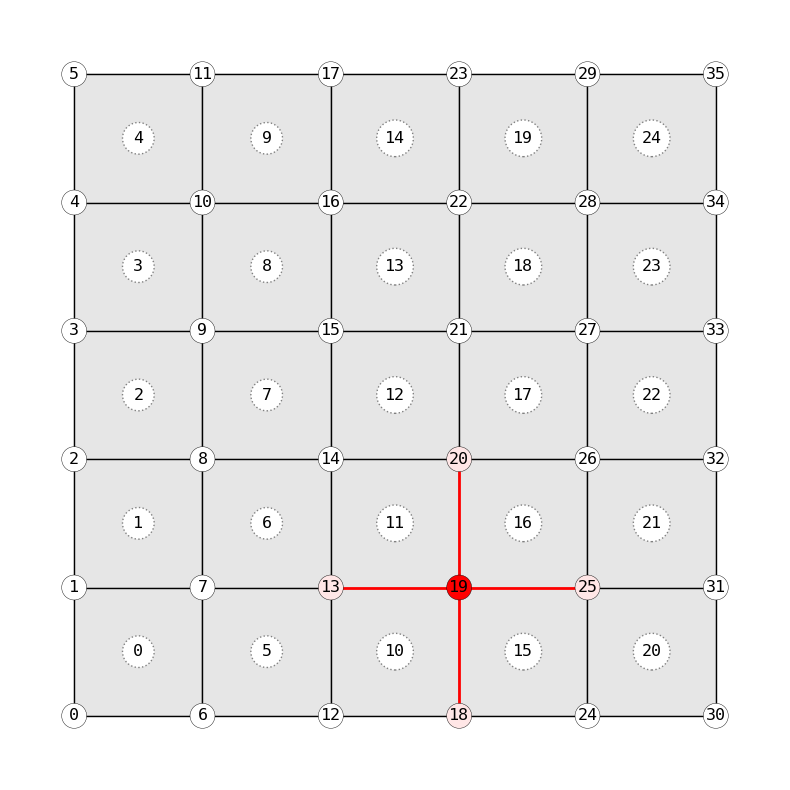

In [97]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find vertex neighbours
# vkey = 20
vkey = mesh.get_any_vertex()
v_nbrs = mesh.vertex_neighbors(vkey)

# visualization
vertex_color = {vkey: (1.0, 0.0, 0.0)}
edge_color = {}
edge_width = {}

for v_nbr in v_nbrs:
    vertex_color[v_nbr] = (1.0, 0.9, 0.9)
    edge_color[(vkey, v_nbr)] = (1.0, 0.0, 0.0)
    edge_width[(vkey, v_nbr)] = 2.0

# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, vertexcolor=vertex_color, edgecolor=edge_color, edgewidth=edge_width)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

### B1_b. Vertex Degree
In mesh, the degree (or valency) of a vertex is the number of edges that are incident to the vertex.  The maximum degree of a mesh, and the minimum degree of a mesh, are the maximum and minimum of its vertices' degrees. 

In [101]:
from compas.datastructures import Mesh# vertex degree
# for vkey in mesh.vertices():
#     print(mesh.vertex_degree(vkey), end="  ")

vkey = mesh.get_any_vertex()
print("vertex", vkey, "degree", mesh.vertex_degree(vkey))

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)



vertex 4 degree 3


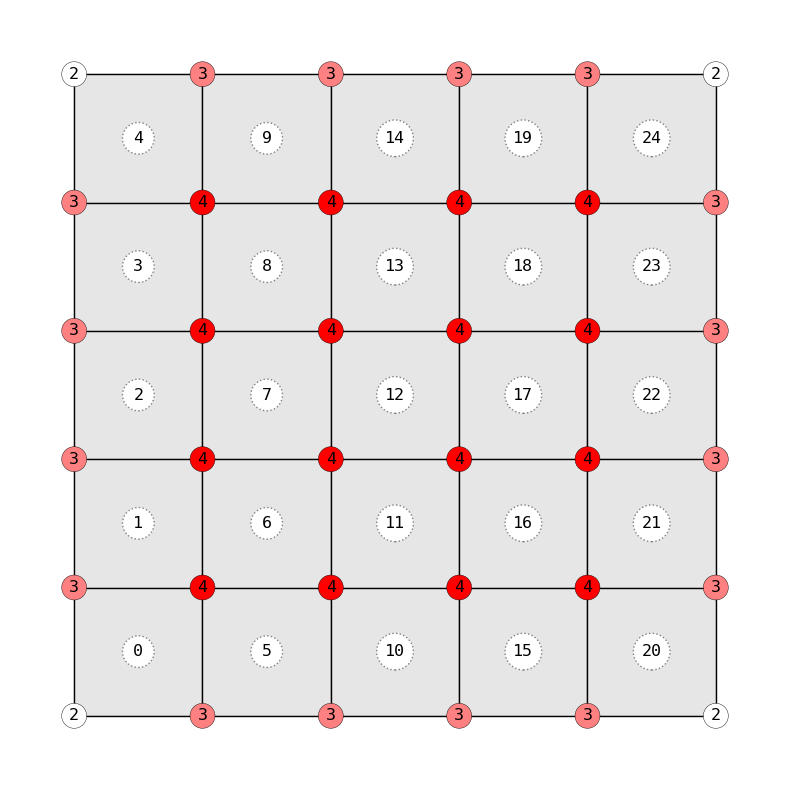

In [102]:
from compas.datastructures import Mesh
from compas_plotters import Plotter
from compas.utilities import i_to_red

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# visualization
vertex_text = {}
vertex_color = {}
max_vertex_degree = mesh.vertex_max_degree()
min_vertex_degree = mesh.vertex_min_degree()

for vkey in mesh.vertices():
    vertex_degree = mesh.vertex_degree(vkey)
    vertex_text[vkey] = str(vertex_degree)
    vertex_color[vkey] = i_to_red(float((vertex_degree - min_vertex_degree) / (max_vertex_degree - min_vertex_degree)), normalize=True)

# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, vertextext=vertex_text, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

### B1_c. Vertex Faces

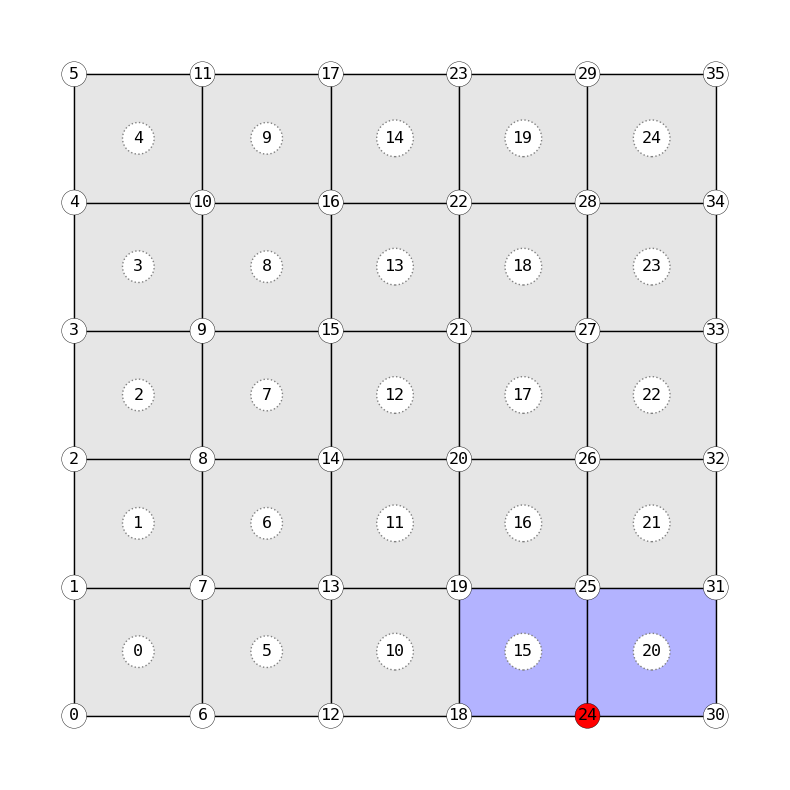

In [104]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find vertex faces
# vkey = 20
vkey = mesh.get_any_vertex()
f_nbrs = mesh.vertex_faces(vkey)

# visualization
vertex_color = {vkey: (1.0, 0.0, 0.0)}
face_color = {f_nbr: (0.7, 0.7, 1.0) for f_nbr in f_nbrs}

# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, vertexcolor=vertex_color, facecolor=face_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

### B1_d. Vertex Area
Compute the tributary area of a vertex. Tributary area is often used to estimate design loads of structural elements subjected to vertical surface loading. 

In [109]:
from compas.datastructures import Mesh

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find vertex tributary area
vkey = mesh.get_any_vertex()
print("vertex", vkey, "area", mesh.vertex_area(vkey))

vertex 33 area 0.5


## B2. Face

# C. Subdivison
Mesh Class contains different subdivision methods to densify the original mesh.

# D. Mesh Attributes